<a href="https://colab.research.google.com/github/Summit2/ML_education/blob/main/Comparison_of_GD_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import seaborn as sns
sns.set(style="darkgrid", font_scale=1.4)
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import TensorDataset, DataLoader

from torchvision.datasets import MNIST
from torchvision import transforms
from tqdm.autonotebook import tqdm, trange

<ipython-input-1-a486a786c1f7>:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
data_transforms = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5),(0.5))

    ]

)

In [3]:
root = './'
train_dataset = MNIST(root, transform=data_transforms, download = True)
val_dataset = MNIST(root, transform=data_transforms,download = True)

train_dataloader = DataLoader(train_dataset, batch_size = 128)
val_dataloader =  DataLoader(val_dataset, batch_size = 128)

loaders = {'train' : train_dataloader,
           'valid' : val_dataloader }

100%|██████████| 9912422/9912422 [00:00<00:00, 104624832.32it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 114603305.42it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29611910.87it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18370808.84it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:

class LeNet (nn.Module):
  def __init__(self):
      super(LeNet, self).__init__()

      self.conv1 = nn.Conv2d(1,6,3)

      self.pool1 = nn.MaxPool2d(2)
      self.conv2 = nn.Conv2d(6,16,3)


      self.fc1 = nn.Linear(1936,120)

      self.fc2 = nn.Linear(120,84)

      self.fc3 = nn.Linear(84,10)

      self.activation = nn.ReLU(inplace=True)

  def forward(self,x):
      x = self.activation(self.conv1(x))
      # print(x)
      x = self.pool1(x)
      x = self.activation(self.conv2(x))

      x = torch.flatten(x, start_dim = 1)
      x = self.activation(self.fc1(x))
      x = self.activation(self.fc2(x))
      x = self.fc3(x)

      return x



In [5]:
LeNet()
# train_loop(optimizer)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1936, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (activation): ReLU(inplace=True)
)

In [11]:
def train_loop(model, optim):

  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  model = model
  model = model.to(device)

  criterion = torch.nn.CrossEntropyLoss()


  max_epochs = 10
  accuracy = {"train": [], "valid": []}



  for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
      epoch_correct = 0
      epoch_all = 0
      for x_batch, y_batch in dataloader:
        x_batch, y_batch = x_batch.to(device) ,y_batch.to(device)
        # print(type(x_batch))

        if k == "train":

            model.train()
            optimizer.zero_grad()
            # print((x_batch).size())
            outp = model(x_batch)

            loss = criterion(outp, y_batch)
            loss.backward()
            optimizer.step()


        elif k == "valid":
          model.eval()
          with torch.no_grad():
            outp = model(x_batch)

        #посчитаем accuracy
        predictions = outp.argmax(-1)
        # print(predictions)


        all = 128
        correct = (predictions.cpu().detach().numpy() == y_batch.cpu().detach().numpy()).sum()

        epoch_all +=all
        epoch_correct+=correct

        # print(correct_answers)
      if k == 'train':

          print(f"Epoch {epoch+1}")

      print(f"State: {k}  Accuracy = {epoch_correct/epoch_all}")
      accuracy[k].append(epoch_correct/epoch_all)
  return accuracy


In [ ]:
model = LeNet()

In [13]:


optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)
SGD_accuracy = train_loop(model,optimizer)


Epoch 1
State: train  Accuracy = 0.9702492004264393
State: valid  Accuracy = 0.9699493603411514
Epoch 2
State: train  Accuracy = 0.9733142324093816
State: valid  Accuracy = 0.9734974680170576
Epoch 3
State: train  Accuracy = 0.9754131130063965
State: valid  Accuracy = 0.9756629797441365
Epoch 4
State: train  Accuracy = 0.9773454157782516
State: valid  Accuracy = 0.9774620202558635
Epoch 5
State: train  Accuracy = 0.9786780383795309
State: valid  Accuracy = 0.9790445095948828
Epoch 6
State: train  Accuracy = 0.9796941631130064
State: valid  Accuracy = 0.98042710554371
Epoch 7
State: train  Accuracy = 0.9807602611940298
State: valid  Accuracy = 0.9813932569296375
Epoch 8
State: train  Accuracy = 0.9817264125799574
State: valid  Accuracy = 0.982376066098081
Epoch 9
State: train  Accuracy = 0.9826925639658849
State: valid  Accuracy = 0.9830923507462687
Epoch 10
State: train  Accuracy = 0.9834088486140725
State: valid  Accuracy = 0.9838252931769723


In [14]:
optimizer = torch.optim.Adagrad(params = model.parameters())
Adagrad_accuracy = train_loop(model,optimizer)

Epoch 1
State: train  Accuracy = 0.9471281982942431
State: valid  Accuracy = 0.9692997068230277
Epoch 2
State: train  Accuracy = 0.9780617004264393
State: valid  Accuracy = 0.978494802771855
Epoch 3
State: train  Accuracy = 0.9827258795309168
State: valid  Accuracy = 0.9820762260127932
Epoch 4
State: train  Accuracy = 0.9853744669509595
State: valid  Accuracy = 0.9850746268656716
Epoch 5
State: train  Accuracy = 0.9874233742004265
State: valid  Accuracy = 0.9873400852878464
Epoch 6
State: train  Accuracy = 0.9888392857142857
State: valid  Accuracy = 0.9889225746268657
Epoch 7
State: train  Accuracy = 0.9903218283582089
State: valid  Accuracy = 0.990405117270789
Epoch 8
State: train  Accuracy = 0.9915045309168443
State: valid  Accuracy = 0.9913379530916845
Epoch 9
State: train  Accuracy = 0.9921042110874201
State: valid  Accuracy = 0.9919542910447762
Epoch 10
State: train  Accuracy = 0.9929371002132196
State: valid  Accuracy = 0.9925872867803838


In [15]:
optimizer = torch.optim.RMSprop(params = model.parameters())
RMSprop_accuracy = train_loop(model,optimizer)

Epoch 1
State: train  Accuracy = 0.8770489072494669
State: valid  Accuracy = 0.9084155117270789
Epoch 2
State: train  Accuracy = 0.9559734808102346
State: valid  Accuracy = 0.9232909115138592
Epoch 3
State: train  Accuracy = 0.9645688965884861
State: valid  Accuracy = 0.8914245735607675
Epoch 4
State: train  Accuracy = 0.9745802238805971
State: valid  Accuracy = 0.9635027985074627
Epoch 5
State: train  Accuracy = 0.9792277452025586
State: valid  Accuracy = 0.9792610607675906
Epoch 6
State: train  Accuracy = 0.9822761194029851
State: valid  Accuracy = 0.9833588752665245
Epoch 7
State: train  Accuracy = 0.9842917110874201
State: valid  Accuracy = 0.972714552238806
Epoch 8
State: train  Accuracy = 0.9856909648187633
State: valid  Accuracy = 0.9655350479744137
Epoch 9
State: train  Accuracy = 0.9867237473347548
State: valid  Accuracy = 0.9829091151385928
Epoch 10
State: train  Accuracy = 0.9874233742004265
State: valid  Accuracy = 0.9834921375266524


In [16]:
optimizer = torch.optim.Adam(params = model.parameters())
Adam_accuracy = train_loop(model,optimizer)

Epoch 1
State: train  Accuracy = 0.9941697761194029
State: valid  Accuracy = 0.9965684968017058
Epoch 2
State: train  Accuracy = 0.9965185234541578
State: valid  Accuracy = 0.9978178304904051
Epoch 3
State: train  Accuracy = 0.9976179371002132
State: valid  Accuracy = 0.9981343283582089
Epoch 4
State: train  Accuracy = 0.998117670575693
State: valid  Accuracy = 0.9985341151385928
Epoch 5
State: train  Accuracy = 0.9984175106609808
State: valid  Accuracy = 0.9988672707889126
Epoch 6
State: train  Accuracy = 0.9987839818763327
State: valid  Accuracy = 0.9989339019189766
Epoch 7
State: train  Accuracy = 0.9989505597014925
State: valid  Accuracy = 0.9990171908315565
Epoch 8
State: train  Accuracy = 0.9990171908315565
State: valid  Accuracy = 0.9990338486140725
Epoch 9
State: train  Accuracy = 0.9991337953091685
State: valid  Accuracy = 0.9990171908315565
Epoch 10
State: train  Accuracy = 0.9987506663113006
State: valid  Accuracy = 0.9989005863539445


In [17]:
!nvidia-smi

Thu Nov  9 09:26:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    28W /  70W |   1165MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

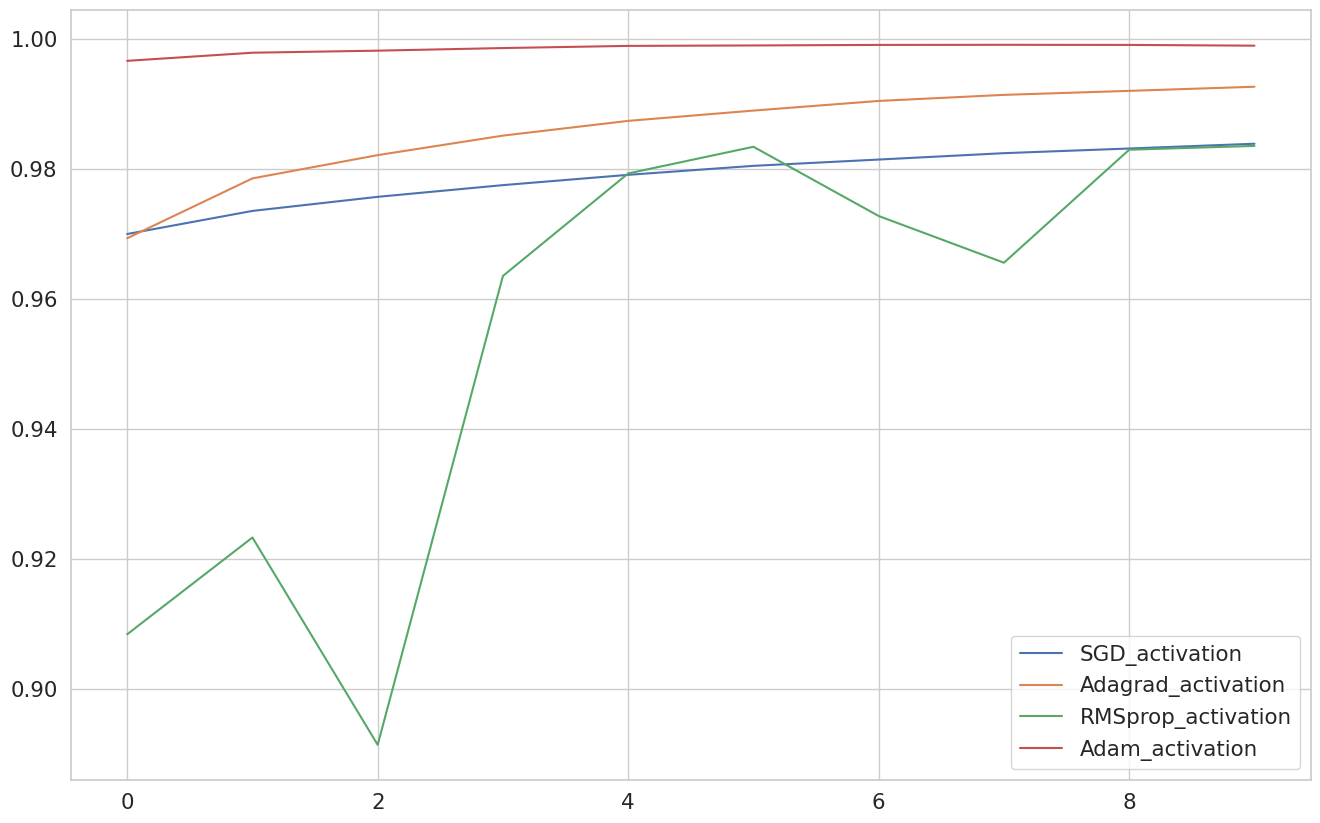

In [19]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

plt.figure(figsize= (16,10))
plt.plot(range(10), SGD_accuracy['valid'], label = 'SGD_activation')
plt.plot(range(10),Adagrad_accuracy['valid'], label = 'Adagrad_activation')
plt.plot(range(10),RMSprop_accuracy['valid'], label = 'RMSprop_activation')
plt.plot(range(10),Adam_accuracy['valid'], label = 'Adam_activation')
plt.legend()
plt.show()